In [39]:
import random as rd
import numpy as np
import scipy as sp

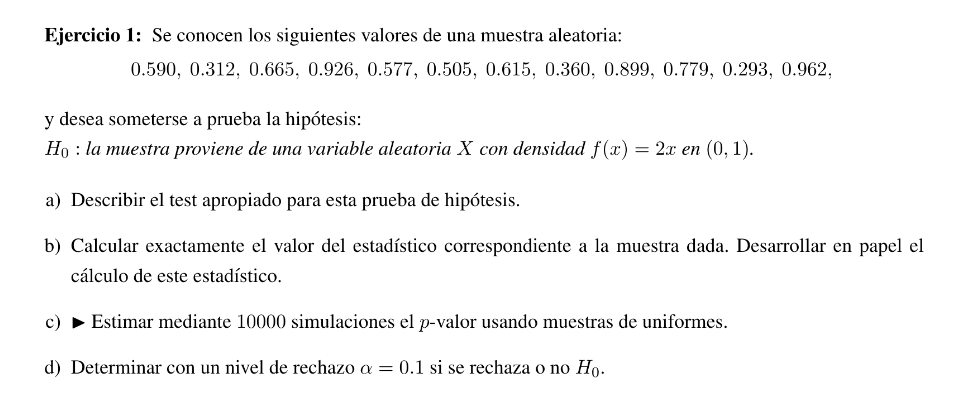

Si la  variable aleatoria X tiene densidad $f(x)=2x$ en (0,1). Entonces la funcion de distribucion acomulada es:
$$
F(x) = \int_{0}^{x} 2t dt = t^2 |_{0}^{x} = x^2 \\
F(x) = \begin{cases} 0 & \text{si } x \leq 0 \\ x^2 & \text{si } 0 < x < 1 \\ 1 & \text{si } x \geq 1 \end{cases}
$$

Y si queremos generar una muestra de dicha distribucion debemos obtener la inversa de la funcion de distribucion acumulada:
$$
F(x) = x^2 \Rightarrow x = \sqrt{u} \text{ con } u \sim U(0,1)
$$

In [40]:
def F(x):
    if x < 0:
        return 0
    elif x >=1:
        return 1
    else:
        return x**2

Luego el test apropiado para esta hipotesis es el test de Kolmogorov-Smirnov. Como en este caso nuesta hipotesis sugiere que los datos vienen de una distribucion F conocida, entonces sean $x_{(1)},x_{(2)}, \cdots, x_{(n)}$ las muestras podemos calcular el estadistico de Kolmogorov-Smirnov como:
$$
D = \max_{1 \leq i \leq n} \left( \max \left( F(x_{(i)}) - \frac{i-1}{n}, \frac{i}{n} - F(x_{(i)}) \right) \right)
$$

In [41]:
x_n = [0.590, 0.312, 0.665, 0.926, 0.577, 0.505, 0.615, 0.360, 0.899, 0.779, 0.293, 0.962]
x_n.sort()
print(x_n)
print(f"Tamaño de la muestra n: {len(x_n)}")

[0.293, 0.312, 0.36, 0.505, 0.577, 0.59, 0.615, 0.665, 0.779, 0.899, 0.926, 0.962]
Tamaño de la muestra n: 12


In [42]:
def estadistico_K_S(fun, x_n):
    x_n.sort()
    n = len(x_n)
    D = 0
    for i in range(n):
        izq = ((i+1)/n) - fun(x_n[i])
        der = fun(x_n[i]) - (i/n)
        D = max(D, izq, der)
    return D

In [43]:
estadistico_K_S(F, x_n)

0.2244416666666666

In [44]:
def estimar_pvalor_K_S(nsims, fun, x_n):
    n = len(x_n)
    D = estadistico_K_S(fun, x_n)
    hits = 0
    for i in range(nsims):
        """ 
        Debo generar nsims muestras de tamaño n de una distribución uniforme, 
        y calcular el estadistico D. Luego el p-valor es la proporcion de
        veces que D es mayor que el estadistico de la muestra original. 
        """
        muestra_sim = np.random.uniform(size=n)
        D_sim = estadistico_K_S(lambda x: x, muestra_sim)
        if D_sim > D:
            hits += 1
    return hits/nsims

In [45]:
estimar_pvalor_K_S(10000, F, x_n)

0.5085

Como el nivel de rechazo es $\alpha = 0.1$ y el $p-valor \gt 0.1$ entonces no rechazo la $H_0$